In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\adrik\Documents\Cleaned_Dataset\cleaned_dataset.csv")
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,Route
0,Thursday,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,...,0,N,0,2,0,0,0,32,1,IND-BWI
1,Thursday,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,...,0,N,0,10,0,0,0,47,1,IND-LAS
2,Thursday,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,...,0,N,0,8,0,0,0,72,1,IND-MCO
3,Thursday,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,...,0,N,0,3,0,0,0,12,1,IND-PHX
4,Thursday,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,...,0,N,0,0,0,0,0,16,1,IND-TPA


In [5]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

DayOfWeek               0
Date                    0
DepTime                 0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
Airline                 0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Org_Airport          1177
Dest                    0
Dest_Airport         1479
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
Month                   0
Route                   0
dtype: int64


DATA PREPARATION

Convert relevant columns to appropriate data types for analysis and visualization

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['DepTime'] = pd.to_datetime(df['DepTime'], format='%H:%M', errors='coerce').dt.time
df['ArrTime'] = pd.to_datetime(df['ArrTime'], format='%H:%M', errors='coerce').dt.time
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for col in delay_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

Analyza delay causes by airline

Calculate and compare different types of delays (CarrierDelay,WeatherDelay,NASDelay)for each airline

In [9]:
airline_delay_means = df.groupby('Airline')[['CarrierDelay', 'WeatherDelay', 'NASDelay']].mean()
display(airline_delay_means)

,CarrierDelay,WeatherDelay,NASDelay
Airline,,,
Alaska Airlines Inc.,21.397000,1.158500,9.536800
American Airlines Inc.,20.064008,2.898663,16.548396
American Eagle Airlines Inc.,16.860063,4.407203,15.407901
Atlantic Southeast Airlines,33.603947,11.535916,13.273903
Delta Air Lines Inc.,19.871575,2.326671,15.527829
Frontier Airlines Inc.,14.718518,0.739598,15.615001
Hawaiian Airlines Inc.,36.410417,0.295139,0.038889
JetBlue Airways,13.925150,0.720906,23.811703
Skywest Airlines Inc.,20.086476,3.941112,18.152052


<Figure size 1200x600 with 0 Axes>

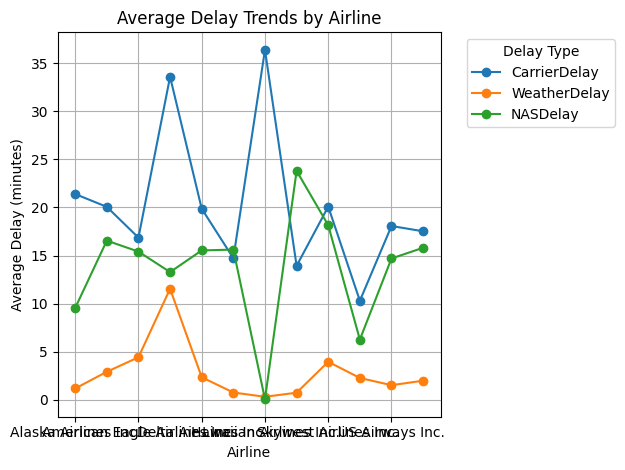

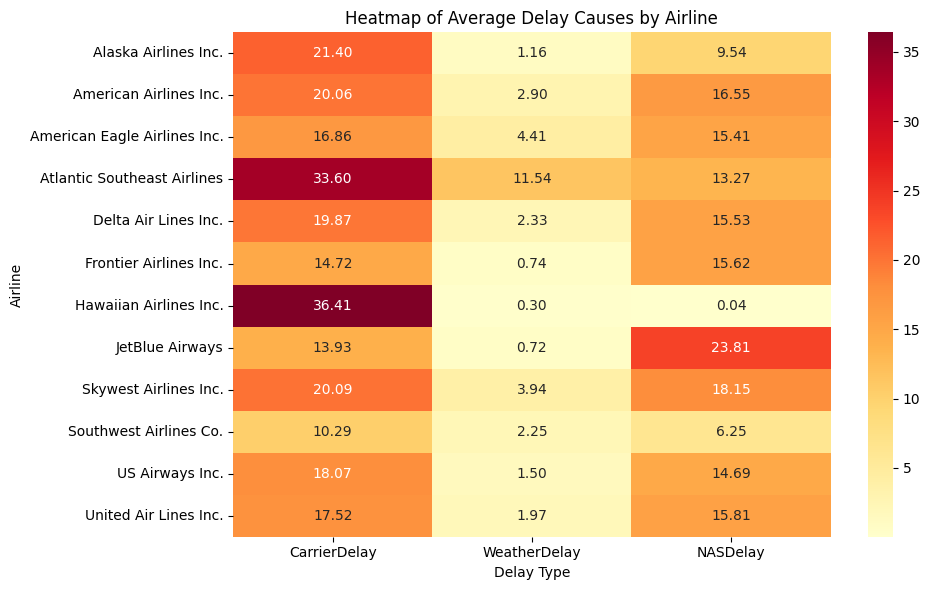

In [10]:

plt.figure(figsize=(12, 6))
airline_delay_means.plot(marker='o')
plt.title('Average Delay Trends by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.legend(title='Delay Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.heatmap(airline_delay_means, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title('Heatmap of Average Delay Causes by Airline')
plt.xlabel('Delay Type')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()


C:\Users\adrik\AppData\Local\Temp\ipykernel_37860\320297848.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DepHour'] = pd.to_datetime(df['DepTime'].astype(str)).dt.hour
C:\Users\adrik\AppData\Local\Temp\ipykernel_37860\320297848.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ArrHour'] = pd.to_datetime(df['ArrTime'].astype(str)).dt.hour


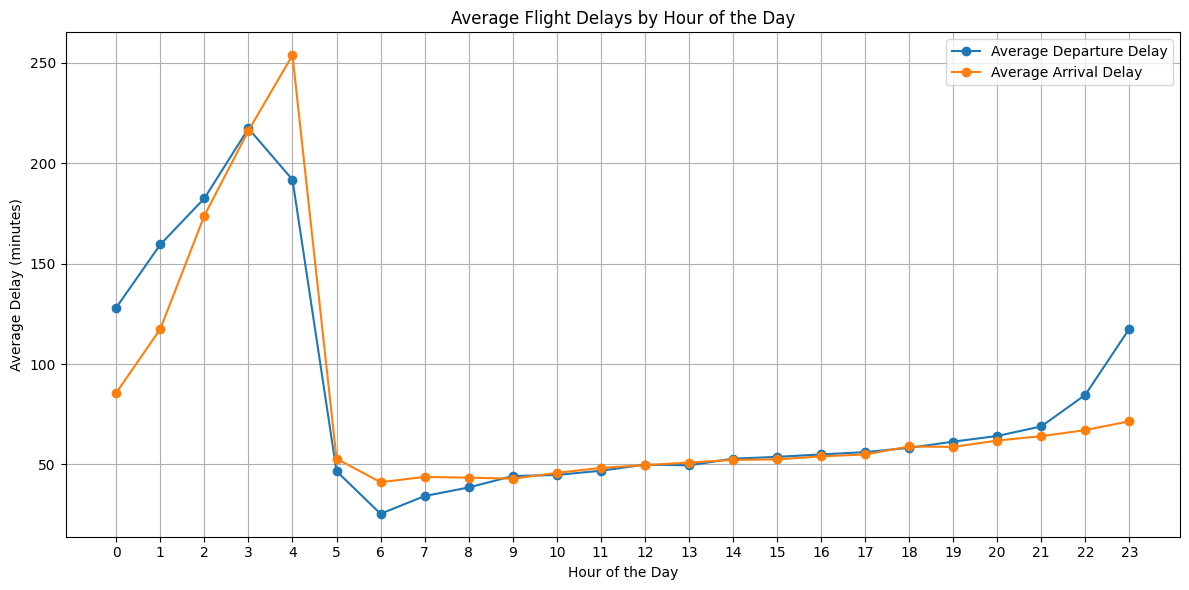

In [11]:
df['DepHour'] = pd.to_datetime(df['DepTime'].astype(str)).dt.hour
df['ArrHour'] = pd.to_datetime(df['ArrTime'].astype(str)).dt.hour

hourly_dep_delay = df.groupby('DepHour')['DepDelay'].mean()
hourly_arr_delay = df.groupby('ArrHour')['ArrDelay'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_dep_delay.index, hourly_dep_delay.values, marker='o', label='Average Departure Delay')
plt.plot(hourly_arr_delay.index, hourly_arr_delay.values, marker='o', label='Average Arrival Delay')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Flight Delays by Hour of the Day')
plt.xticks(hourly_dep_delay.index)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
origin_airport_delay = df.groupby('Origin')['DepDelay'].mean()
dest_airport_delay = df.groupby('Dest')['ArrDelay'].mean()

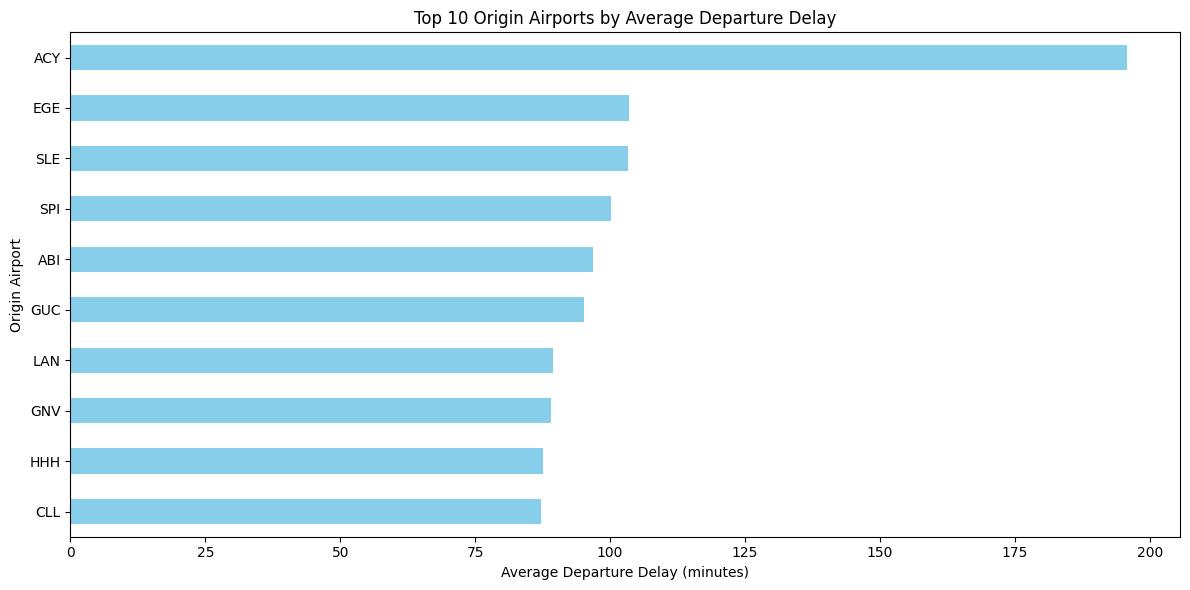

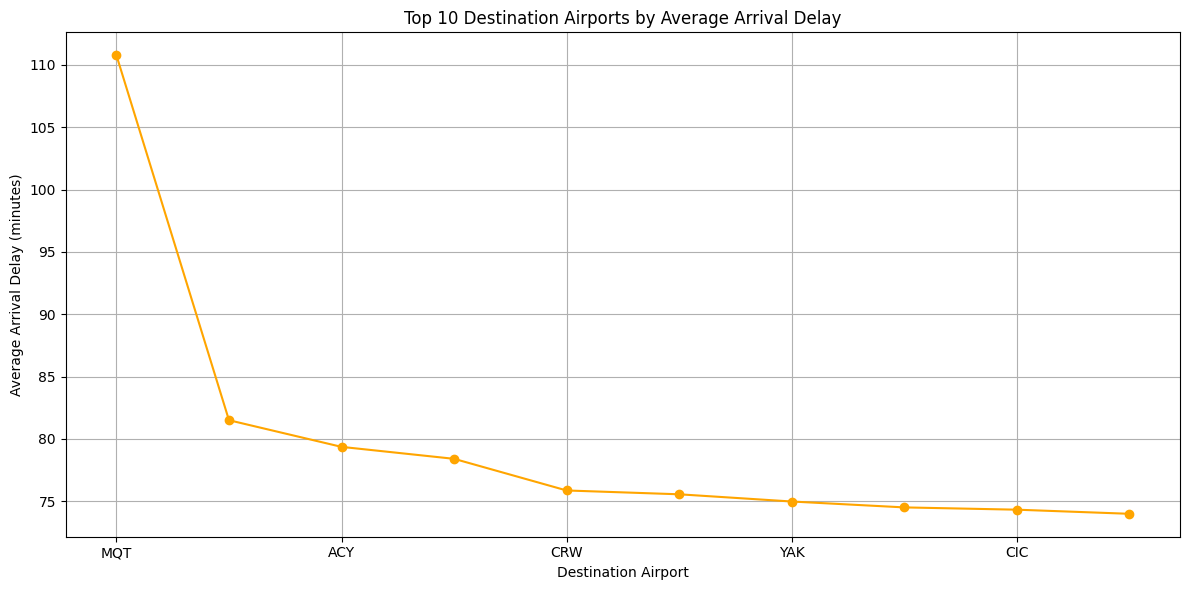

In [13]:
# Horizontal Bar Chart for Origin Airports
plt.figure(figsize=(12, 6))
origin_airport_delay.sort_values(ascending=False).head(10).plot(
    kind='barh', color='skyblue'
)
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Origin Airport')
plt.title('Top 10 Origin Airports by Average Departure Delay')
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()

# Line Plot for Destination Airports
plt.figure(figsize=(12, 6))
dest_airport_delay.sort_values(ascending=False).head(10).plot(
    marker='o', linestyle='-', color='orange'
)
plt.xlabel('Destination Airport')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Top 10 Destination Airports by Average Arrival Delay')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
max_dep_delay_hour = hourly_dep_delay.idxmax()
max_arr_delay_hour = hourly_arr_delay.idxmax()
max_origin_delay_airport = origin_airport_delay.idxmax()
max_dest_delay_airport = dest_airport_delay.idxmax()

print(f"Hour with maximum average departure delay: {max_dep_delay_hour}")
print(f"Hour with maximum average arrival delay: {max_arr_delay_hour}")
print(f"Origin airport with maximum average departure delay: {max_origin_delay_airport}")
print(f"Destination airport with maximum average arrival delay: {max_dest_delay_airport}")

Hour with maximum average departure delay: 3.0
Hour with maximum average arrival delay: 4.0
Origin airport with maximum average departure delay: ACY
Destination airport with maximum average arrival delay: MQT


In [15]:
df['TotalDelay'] = df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum(axis=1)
airline_total_delay_means = df.groupby('Airline')['TotalDelay'].mean()
top_airlines_by_total_delay = airline_total_delay_means.sort_values(ascending=False)
display(top_airlines_by_total_delay)

Airline
JetBlue Airways                 72.869370
United Air Lines Inc.           69.670539
American Airlines Inc.          65.729621
Skywest Airlines Inc.           65.187659
American Eagle Airlines Inc.    64.277233
Atlantic Southeast Airlines     63.210684
Delta Air Lines Inc.            59.292422
US Airways Inc.                 58.454165
Alaska Airlines Inc.            57.557600
Hawaiian Airlines Inc.          55.658333
Southwest Airlines Co.          51.032945
Frontier Airlines Inc.          41.973150
Name: TotalDelay, dtype: float64

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Bar plot of top airlines by total delay
plt.figure(figsize=(12, 6))
top_airlines_by_total_delay.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Average Total Delay (minutes)')
plt.title('Top Airlines by Average Total Delay')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Line plot of average total delay over the month
df['Day'] = df['Date'].dt.day
daily_total_delay = df.groupby('Day')['TotalDelay'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_total_delay.index, daily_total_delay.values, marker='o')
plt.xlabel('Day of the Month')
plt.ylabel('Average Total Delay (minutes)')
plt.title('Average Total Flight Delay by Day of the Month')
plt.xticks(daily_total_delay.index)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot of average total delay by day of the week
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=dayofweek_order, ordered=True)
dayofweek_total_delay = df.groupby('DayOfWeek')['TotalDelay'].mean()

plt.figure(figsize=(10, 6))
dayofweek_total_delay.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Delay (minutes)')
plt.title('Average Total Flight Delay by Day of the Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()